# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:

The environment looks like a grid-like structure with different blocks. There are two-lane roads with cars moving in opposite directions in each lane. At each time-point, there is a change in conditions of each cross-road pint (waypoint) - there is a red signal or a green signal and the cars have choice whether to move in any direction (left, right or forward) - change their state or remain idle. Based on the choice made - rewards are given if a correct choice is made - to move at a green signal with no oncoming traffic and to stay idle at a red light.

The smartcab in this simulation does not move at all - it does not change its state and does not take any action. No matter what the conditions are, it remains idle. This is a good choice if there is red signal but bad choice when there is a green signal.
The agent is getting rewards in the range of  -6 to +3.

As the conditions of the waypoint changes - the agent is awarded a positive award when there is a red signal and is awarded a negative reward when the signal is green since it stays idle all the time. The negative reward for staying idle at a green signal is higher than the positive reward for staying idle at a red signal which indicates that not taking an action at a green signal is more severe.

Agent is also not enforced to meet the deadline to reach its destination on time which is contributing to the negative reward.

**

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:

-  Flags:
    - verbose: When set to True, simulation gives additional information in the command window such as the location, heading,                  action taken, state, violation and reward. This information is helpful in Debugging and detecting where the agent                is making mistakes and correcting them. Note that this information is displayed only in the command window and                  not the Simulation GUI window.

    - enforce_deadline: When set to True, the simualtion keeps an account of the time taken by the agent to reach its next state                         and after every time step, it updates the remaining time for the agent to reach the destination. The                             reward is now calculated by taking the time limit into consideration in addition to the action and the                           violation. If the agent does not move in the right direction with each time step towards the                                     destination, then it goes farther from the destination which means that the negative reward increases.

    - log_metrics: When set to True, the simulator creates a directory called logs in which it records the results of the                          simulation and the trial in a csv file which can used to display metrics of the trials and evaluate                              performance.




-  When the agent performs one of the four available actions - 'idle', left', 'right' and 'forward', the function act() is called in the Environment class. This function when called, helps the agent perform an action and based on the violation, it gives the agent reward or penalty


- render_text() function in the simulator is used to display the text in the command window for each time step when the simulation is run. This is helpful when the pygame package is not available and the GUI simulation cannot be displayed.
 render() function, on the other hand, displays the text in the GUI window of the simulation and updates it for each time step.
 
 
- The next_waypoint() function first conditions on the dx - distance delta between the current location and destination in the x direction and based on this it decides which action to take. Thus, it considers the East-West Direction first. Only when the delta in x diirection is 0 is when it considers the delta in vertical direction -y direction and considers motion in North-South direction.

   
   
    
    


**

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


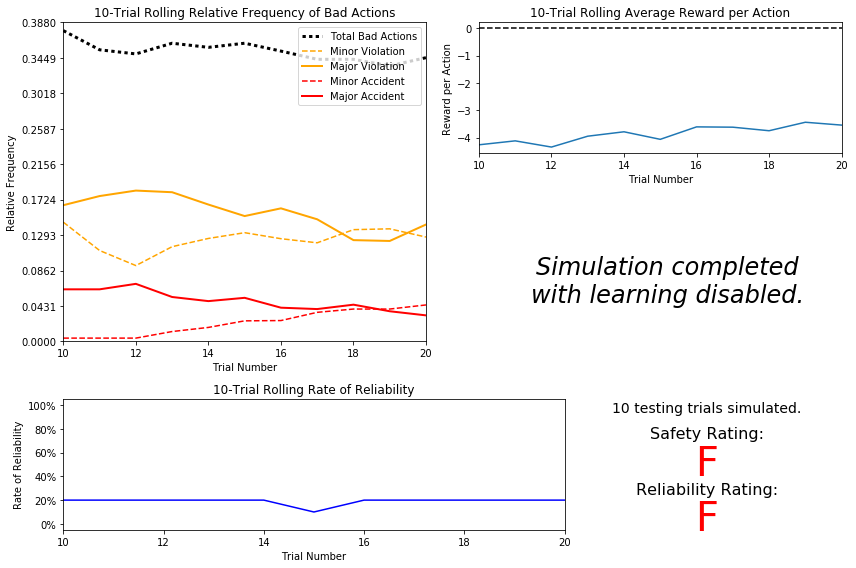

In [7]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:


- Understanding the trials and simulation:In the above simulation, a total of 20 training trials and 10 testing trials were conducted on the smartcab. Learning was disabled for this simulation i.e the agent was not learning from its past mistakes and rewards. Of all the four valid actions = None(idle), forward, right, left, smartcab randomly chose an action at each time step. An initial deadline (number of time steps to reach the destination) was given for each trial and if the smartcab reached its destination with time steps remaining which is given by final deadline, then the trial is a success. This is a measure of relialibility of the smartcab, how often is the smartcab reaching its destination.When a random action in each time step, depending on its state and other environment variables, that action is either considered a good action or it results in either a violation (Minor or Major depending on the severity) or an accident (Minor or Major depending on the severity). This is the measure of safety of the smartcab - how safe is the smartcab when it takes an action.



- Understanding the Safety and Reliability ratings: To measure the safety of the smartcab, a total of all the actions (actions which resulted in neither violation nor accident) and is divided by the total number of time steps to reach the destination for all the testing trials - given by initial deadline minus the final deadline. This gives an average number of the good actions for each time step. If this is 1 that means that the driving was perfect and a rating of A+ is given. If not, a total of all the major accidents is calculated. If this is greater than 0, then it means at least one major accident took place in all the trial. This is a major non-conformance and the smartcab is very unsafe to drive. A rating of 'F' is given. As given in the above plot, the safetry rating received by the smartcab in the above simulation is 'F' which means at least one major accident took place in all the trials. Reliability is a measure of how successful the agent is reaching its destination before the deadline. To measure this, an average of all the success (0 if not reached and 1 if reached) is taken for all the tranining samples. If this average is below 0.6 - meaning that the agent is reaching its destination 60% of the time , then a  rating of 'F' is given which is very poor - agent is not reliable. In the above simulation, the smartcab is given 'F' rating for reliability due to its very low rate of success. A major reason for these poor ratings of safety and reliability could be that the agent is randomly choosing an action as opposed to choosing a distinct action for each state by learning and following a policy.


- Understanding the plots: All the three plots in the above simulation are rolling avergare plots with window of 10 which means that one datapoint on the x axis corresponds to the average of the first 10 trials results and the next datapoint is the average of the next 10 trials results. This type of rolling average plots helps to reduce the noise in between the trials and gives a bigger picture to see the results of the simulation. The first plot is the rolling relative frequency of bad actions. It has all the violations and accidents (bad actions) plotted against the trial number (average of 10 relative frequencies of 10 trials). Ths indicated how often is the agent commiting a bad action - what's the proportion of the bad action was commited in that trial. For example, consider the minor accidents plot which increases as we go from left to right. For trial numbers - 10 to 12, the proportion of minor accidents is slightly above 0 which is minimal and we go to trial number 20, the minor accidents proportion- relative frequency increases to 0.043 which means that out of all the actions performed in the trial number 20, an average of ~4% of those actions results in minor accidents. The plot also has a bad actions plot which is basically a difference of good actions - no violaion and 1. As we go from left to right, we see that the bad actions plot is decreasing which means the frequency of bad actions commited by the agent is decreasing. On an average, the relarive frequency of bad actions is around 0.35 which means that ~35% of all the actions are bad which is on the higher side. Of these bad actions, major actions account to about ~6% on average and minor accidents account to about ~2%. Major accidents is showing a decreasing trend but the minor accidents is showing an increasing trend.
    Second plot shown in the above simulation is the Rooling average of the rate of reliability with a window of 10. This plot measures the agent's reliabilty - how reliable the agent is in reaching its destination before the time deadline. As shown in the plot, the success rate of the agent is very low. On an average, agent is reaching its destination only 20% of the time. Since the agent is taking random actions, without any learning of the states, destination location or of the time limit and deadline, it is no surprise that the rate of reliabilty of the agent is so low.
    Third plot in the above simulation is the rolling average of the total rewards - net reward attained by the agent in the trials. The agent recieves positive reward when it takes a good action, it receives positive reward but if the action results in a violation, it recieves a negative reward. If the violation is an accident it is penalized heavily and the amount of negative reward is more severe. When the agent reaches the destination or when the time limit is finished, the total of all the rewards for all the actions - negative and positive gives the net reward. By the results given in the plot, it looks like the average reward per action recieved by the agent is negative and it ranges from -4 to -3.5. This indicates that the agent was commiting a lot of bad actions resulting in heavy penalty.
    Overall with the increase in the number of trials, the results of all the three variables - relaibility, relative frequency of bad actions and average reward per action remains more or less the same - with very minimal changes. Since, the agent is not learning as the number of trials increases, there is no significant improvement.
    Given the results of the simulation and the ratings, this smartcab is very unsafe and very unreliable for it to operate in a real-world enviroment. The high frequncy of bad actions with major accidents commited by the smartcab puts the passengers in a major safety risk and its constant failure to reach the destination makes it unreliable and will not benefit the passengers.


**

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:

Features necessary to define the agent's state keeping in mind the safety and the reliability are:
- Waypoint: This is given by the function next_waypoint() in the planner and it helps the agent in deciding what would be the appropriate next waypoint based on its current location, heading and the distance location and distance. Before taking every action, the agent chooses a heading in a direction (N,S,E,W) in which the agents intends to proceed. The waypoint analyses this and based on its location and the distance from the destination gives an appropriate action - left, right or forward which would minimize the distance between the agent's current location and the final destination. This helps in improving the reliability of the agent as it is taking measures steps towards the destination instead of random actions.

- Sensor data of a state: This is given by inputs variable in the environment and it gives the agent all the necessary information of the surrounding environment which helps agent in making informed decisions and avoid any violations. The sensor data consists of the color of the light - green or red at the agent's current waypoint which is needed for the agent to decide if to take an action or remain idle to avoid any violation. When the light is green, the agent must take an action and out of the possible actions, the agent must decide what is the optimum action to take and for this, the condition of the other agents is necessary. If there are any surrounding dummy agents at a waypoint, sensor data gives the agent information about the direction in which these dummy agents intends to go and based on this, the primary agent decides which action to take and avoid any major or major accidents. This piece of infomation obtained from sensor data at a waypoint is very important in order for the agent to operate safely in the environment and avoid any violations.

- Remaining deadline: As observed previously, the time limit to reach the destination is something which the agent is not taking into consideratio. This is resulting in a high percentage of failure to reach the destination and thus the ovrall rate of reliability. After every time step, the time limit to reach the destination decreases and by keeping a check on this, agent can optimally speed up its actions to reduce its distance from the distance and reach their before the deadling in order to avoid any negative reward and a loss of reliability. This information is provided by the deadline feature in the environment and it calculates the remaining amount of time for the agent - the number of actions remaining to reach its destination which would help improve the agent's reliability.

Overall, all the above three features are necessary in order to fully define the conditions of a particular state of the agent which would help it in making safe and reliable actions

**

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:

The features describing a particular state of the agent are the following:
- waypoint
- Light Color
- Intended direction of a car on the right
- Inended direction of a car on the left
- Intended direction of the oncoming car
- Remaining time steps to reach the destination - deadline

Of these features, only the 'deadline' is continuous, rest all are categorical features. Different combinations of these features will give the total number of states the agent can occupy - state space.
Considering the features - Intended direction of cars of left, right and oncoming. Each of these features can take one of four categories - None, left, right and forward. So all the combinations of these three features is given by 4^3 - 64. This is by keeping the Color of the light constant. Light color can take one of two categories - Red and Green. So the number of combinations is twice - 2x64 = 128. This, in turn is by keeping the waypoint feature constant. The waypoint feature have three distinct categories - forward, left or right. So, the total number of combinations is given by 128x3 = 384. 
The agent can occupy a total of 384 states - which is a reasonaby low number. If the updated_delay - time between the two steps in a trial is brought down low, testing van be done in reasonabe time. We just to have see that the agent each of these 384 states atleast ones and learn from the actions taken.

**

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

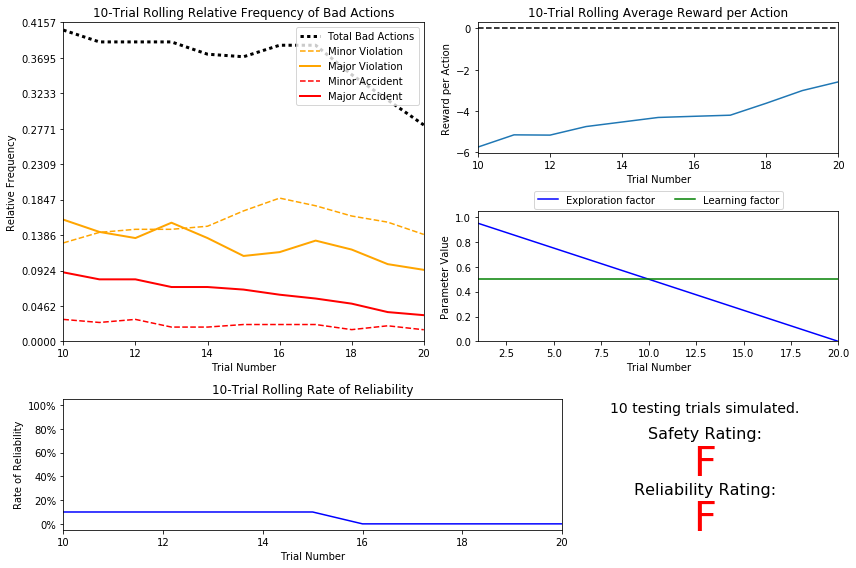

In [24]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:

In this simulation instead of choosing random actions, the agent learned from the results and for every step it chose the action for which the Q-value was maximum. This is done by firt initializing a Q-value associated with a state to 0 and updated it with the immediate reward received by following that action in the direction of alpha (learning factor).
A linear decaying function was used to update the exploration factor (epsilon) after each trial and based on it's threshold value, the number of training trials are decided before the simulation conducts the testing trials.
This is confirmed by the Parameter value vs the Trial Number plot which shows the Learning Factor (alpha) to be constant - 0.5 and the Learning factor (epsilon) decreasing from 1.00 which was the initial value before starting the trial.
The decaying function used to update epsilon was - epsilon(t+1) = epsilon(t) - 0.05. The intial value assigned to epsilon was 1.00 and the threshold value(tolerance) set was 0.05. After every trial, the epsilon decreases by 0.05 and when it reaches 0.05 the testing trials begin. 
This means that a total of 19 training trials were conducted before the testing trials began [(1.00 - 0.05) / (0.05)].

Comparing this simulation to the previous basic driving agent simulation, we see that the averge reward per action is still negative but it has an upward trend. As the Trial number increases, the averae reward per action also inreases - it goes from -5 to -3 which is also confirmed by the frequency of bad actions plot. As the trial number increases, the total average bad actions decreases and the major violation and action also decreases which seems to indicate that the agent is learning.

The overall rating is still bad for both Safety and Reliability - F and F. The agent is making to its destination only 10% of the time - which is very unreliable and it the violation are still high for the agent to be considered safe.



**

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

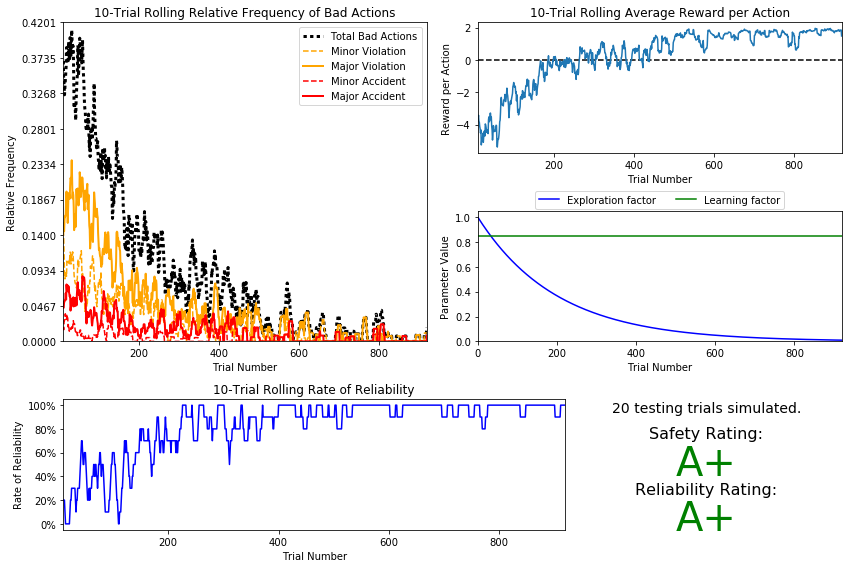

In [35]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:

In the above simulation, an improved epsilon decaying sunction is used - (epsilon) t+1 = 0.995^(t-1) where t is number of trials. The idea behind using this function is to make it decay slowly so that the probability of agent taking random actions is high in the beginning and it explores more so that it covers majority of the states available in the environment and learns and updates the Q-value of those states and actions with the immediate reward received. I just took a reference of 0.5 epsilon and made sure that the simulation performs as many trials as possible before reaching 0.5 epsilon because this is where there is an equal chance of either selecting a random action or an action with max- Q value and as the number of trials increases, the epsilon decreases which means that there is a higher probability of agent taking actions with max-Q value and if the agent hasn't learned enough before reaching this stage (it has not visited a lot of states) then the Q - value has not been updated and taking an action with max-Q value will not be very helpful. This function arrived at 0.5 epsilon at around 180 trials which is a reasonably good number of trials for the agent to learn and update the Q- values.

With this decaying function and the epsilon-tolerance of 0.01, approximately 1000 training trials were peformed by simulation before the epsilon reached 0.01 and the testing trials were started. 20 Testing trials were conducted to ensure that agent can take good action at any random state.

The epsilon - tolerance used was 0.01. This is purposely kept very low because this gives enough time and the required number of training trials for the agent to learn and optimize.
The alpha rate used was 0.8. This is kept high because in the beginning, all the Q-values are assigned to 0.00 and the agent needs to learn quickly from its immediate reward for a particular state. Having an alpha rate of 0.5 means that the agent is only learnng half of what the reward is which is not sufficient. Having an alpha of 0.8 ensures that the agent learns 80% of the immediate reward for that state and 20% of its current Q- value.

A significant improvement has been made with this simulation when compared to the default learning simulation with linear exploration factor. The frequency has decreased immensely and very close to 0.00 at the end of the traning trials. The awerage reward per action has gone from -4 to the positive side. At the end of the training trials, agent was receiving an average of +2 reward per action. The agent has become more relaible and it reaching its destination before the deadline lot more than it used to. 

For the 20 testing trials, the safety rating received is A+ and the reliability rating received is A which is very good and a good indicator the agent has learned significantly.
However, there is still a lot of room for improvement as the plots shows a lot of noise for the reliability and also the frequency of bad actions. The overall trend is not strictly positive - (downward for relative frequency of bad actions and upward for relaibility). There are a few parts where we see a lot of noise and the agent takes action which is not the best


**

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:

The optimal policy for the smartcab is to learn what are it's current environment variables - such as light, direction in which the surrounding cars are going and figure what would be an ideal action to take in terms of safety - without making any violation and reliability - reducing its distance from the destination. The indented direction in order to reduce the distance between its current state and the destination is given by the waypoint and based on other variables, the agent has to make a trade-off between safety and relaibility such as if the intended direction given by the waypoint can lead to accident, the agent should not take that action because the penalty for accident is much higher. 

A state for the agent is recorded as follows:
(waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])

Looking at the results of the simulation, there are a lot of states for which the policy is not optimal i.e the agent performs an action it's not supposed to which results in either a violation or an accident.
But we do find few states for which the policy is optimal and the behavior of the agent is in-line with what s expected given the state the agent is in. 
Some examples foor optimal policy are as follows:

- state - ('left', 'red', None, None, None). The next_point to go to is 'left' but the red light is On and even though the all the surrounding cars are idle, the agent is not supposed to move because its  Red signal. So we expect to see the 'None' action value to be highest which is the action the agent must perform - it should remain idle and this is confirmed by the Q-values of this particular state:

- forward : -10.13
- right : 0.15
- None : 2.20
- left : -10.19

    The None action value is highest so the agent will remain idle at the red signal which is the optimal policy.


- state - ('forward', 'green', 'right', None, 'forward'). The intended waypoint is to go forward. The signal is green and the car on the left is going right. The car on the right is idle which means the signal for the cross street is red - car can take right turn on red signal) and the direction of oncoming car is forward which means that the agent can succesfully move forward which is the optimal direction both in terms of safety and reliability. The Q - values for this state are:

- forward : 1.98
- right : 0.00
- None : 0.00
- left : 0.23

    The Q- value for the forward action is highest. The agent will move froward which is the optimal policy.
    
- state - ('forward', 'green', None, None, None. The ideal direction for the agent to go is forward based on the next waypoint and all the surrounding cars are not moving. The signal is also green which means that the agent can safely move in ths forward direction. The Q-values for the state are:

- forward : 1.71
- right : 0.26
- None : -4.46
- left : 0.09

    The Q-value for the state is highest for forward which is desirable and conforms the optimal policy



- state - ('left', 'red', 'forward', None, 'left'). Another state of red signal where the agent is supposed to remain idle to avoid any violation. The next waypoint is on the left but taking this action can result in accident as the car on the left is moving forward. Q-values for the state are as follows:

- forward : -39.55
- right : -17.39
- None : 1.14
- left : -40.01

    None action Q-value is highest. The agent remains idle at the red signal which is optimal policy.
    
    
There are a few states where the agent does not follow the optimal policy and takes actions which are unexpected which may lead to penalty and severe violation.
One such example is of the below state:

- ('right', 'green', 'right', 'left', 'left').

    The Q-values for this state are:
- forward : 0.00
- right : 0.00
- None : 0.00
- left : 0.93

The signal is green and the next waypoint towards detinaion is right which the agent can take without any violation. The car on the left is going right which should not interfere with the agent's 'right' action and the oncoming car is going lef which must yield to its oncoming car (agent) going forward or right. The agent can take the right turn but instead, it takes a lef turn based on it's Q-value which takes the agent in the opposite direction of the destination and there is also a high chance of accident as the oncoming car is also going to its left and the cars in the opposite directions must pass each other before making their left turns as per [this](http://www.mlive.com/news/index.ssf/2011/12/traffic_talk_what_is_the_prope.html)
The Q-values for all the actions except 'left' for this state is 0.00 which seems to indicate that this state may not have been visited a lot by the agen during the training and hence the Q-values are not updated by the reward taken by random actions.The Q-values are still equal to 0.00 which is what all the Q-values were initialized to in the beginning.
A few more trials with the more random actions - including 'right' which is the optimal action can change this sub-optimal policy.





** 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.